In [1]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks'

In [2]:
!which umap

which: no umap in (/data/aglinska/.local/bin:/data/aglinska/bin:/cm/local/apps/environment-modules/4.4.0/bin:/data/aglinska/anaconda3/bin:/data/aglinska/anaconda3/condabin:/usr/public/tensorflow/2.3.1gpu/bin:/cm/local/apps/cuda/libs/current/bin:/cm/shared/apps/cuda10.1/sdk/10.1.243/bin/x86_64/linux/release:/cm/shared/apps/cuda10.1/toolkit/10.1.243/bin:/cm/shared/apps/slurm/current/sbin:/cm/shared/apps/slurm/current/bin:/cm/local/apps/gcc/9.2.0/bin:/data/aglinska/.local/bin:/data/aglinska/bin:/cm/local/apps/environment-modules/4.4.0/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/usr/sbin:/cm/local/apps/environment-modules/4.4.0/bin:/opt/dell/srvadmin/bin)


In [3]:
from helper_funcs import *
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt

In [4]:
import umap.umap_ as umap
reducer = umap.UMAP()

In [5]:
embedding = pickle.load(open('../Data/embedded_data_noreducer.pickle','rb'))

In [6]:
list(embedding.keys())

['embedding_bg',
 'embedding_sl',
 'embedding_vae',
 'sfari_embedding_vae',
 'sfari_embedding_bg',
 'sfari_embedding_sl',
 'bg_space_abide',
 'sl_space_abide',
 'vae_space_abide',
 'bg_space_sfari',
 'sl_space_sfari',
 'vae_space_sfari',
 'bg_Sspace_sfari',
 'sl_Sspace_sfari',
 'vae_Sspace_sfari']

In [7]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')
df = df[df['DxGroup'].values==1]
df.shape

(470, 90)

In [8]:
df.reset_index(inplace=True)

In [9]:
sl_space = embedding['sl_space_abide']
bg_space = embedding['bg_space_abide']
vae_space = embedding['vae_space_abide']

470


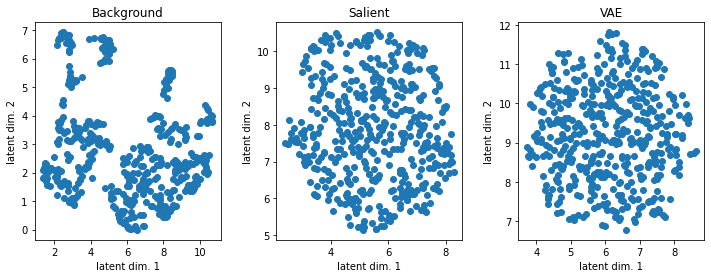

In [10]:
cscatter([bg_space,sl_space,vae_space])

In [11]:
import seaborn as sns

In [12]:
map_ = get_umap_corners(sl_space)
df_new = pd.DataFrame()

for c in ['L','R','T','B','center']:
    df2 = df.copy()
    #df2 = df2[['AgeAtScan', 'FIQ','ADOS_Total', 'ADI_R_RRB', 'ADI_R_VerbalTotal', 'ADI_R_SocialTotal']]
    #df2 = df2[['ScanSiteID']]
    nsubs = 50
    df2 = df2.iloc[map_[c][0:nsubs]]
    df2['subID'] = np.arange(nsubs)
    df2['C'] = c
    df_new = df_new.append(df2)
    
df_new.sample(5)
print(df_new.shape)
#df_new = df_new.dropna()

(250, 93)


In [21]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [13]:
from sklearn.metrics import mutual_info_score

(0.28600719059730556,
 2.6773382606342763e-10,
 0.20075197628151745,
 0.3669627148358363)

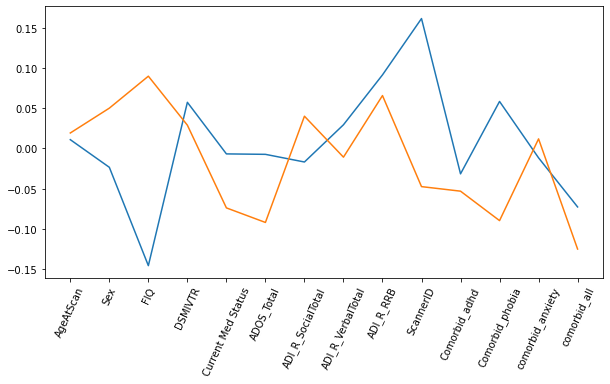

In [15]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

l1 = list()
l2 = list()
for key in keys:
    dfc = pd.DataFrame()
    dfc['ax1'] = sl_space[:,0]
    dfc['ax2'] = sl_space[:,1]
    dfc['val'] = df[key]
    dfc = dfc.dropna()
    c1 = np.corrcoef(dfc['ax1'].values,dfc['val'].values)[0,1]
    c2 = np.corrcoef(dfc['ax2'].values,dfc['val'].values)[0,1]
    
#     c1 = mutual_info_score(dfc['ax1'].values,dfc['val'].values)
#     c2 = mutual_info_score(dfc['ax2'].values,dfc['val'].values)
    l1.append(c1)
    l2.append(c2)
    
plt.figure(figsize=(10,5))
plt.plot(l1);
plt.plot(l2);
plt.xticks(np.arange(len(keys)),labels=keys,rotation=65);

In [28]:
df.columns

Index(['level_0', 'Unnamed: 0', 'index', 'BIDS_ID', 'Anonymized ID',
       'Subject Type', 'Visit', 'Days since enrollment', 'SubID', 'DxGroup',
       'DSMIVTR', 'AgeAtScan', 'Sex', 'FIQ', 'VIQ', 'PIQ', 'IQTest', 'VIQTest',
       'PIQTest', 'ADOS_Module', 'ADOS_Total', 'ADOS_ResearchReliability',
       'ADI_R_SocialTotal', 'ADI_R_VerbalTotal', 'ADI_R_RRB',
       'ADI_R_Onset Total', 'ADI_R_ResearchReliability', 'Handedness_Category',
       'Handedness_Scores', 'ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh',
       'Comorbid_adhd', 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all',
       'comorbid_other', 'Comorbidity', 'SRS_RawTotal', 'SRS_Version',
       'SCQ_Total', 'VINELAND_Receptive_Vscore', 'VINELAND_Expressive_Vscore',
       'VINELAND_Written_Vscore', 'VINELAND_CommunicationStandard',
       'VINELAND_Personal_Vscore', 'VINELAND_Domestic_Vscore',
       'VINELAND_Community_Vscore', 'VINELAND_DaylyLiving_Standard',
       'VINELAND_Interpersonal_Vscore', 'VINELAND_Play_Vsc

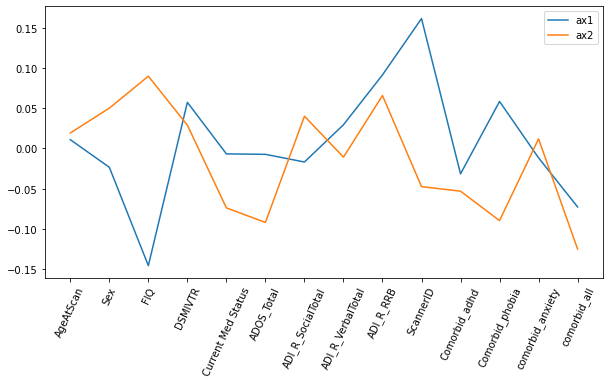

In [27]:
keys = ['AgeAtScan', 'Sex', 'FIQ', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB,'']

l1 = list()
l2 = list()
for key in keys:
    dfc = pd.DataFrame()
    dfc['ax1'] = sl_space[:,0]
    dfc['ax2'] = sl_space[:,1]
    dfc['val'] = df[key]
    dfc = dfc.dropna()
    c1 = pearsonr_ci(dfc['ax1'].values,dfc['val'].values)[0] #np.corrcoef(dfc['ax1'].values,dfc['val'].values)[0,1]
    c2 = pearsonr_ci(dfc['ax2'].values,dfc['val'].values)[0] #np.corrcoef(dfc['ax2'].values,dfc['val'].values)[0,1]
    
    l1.append(c1)
    l2.append(c2)
    
plt.figure(figsize=(10,5))
plt.plot(l1);
plt.plot(l2);
plt.xticks(np.arange(len(keys)),labels=keys,rotation=65);
plt.legend(['ax1','ax2'])

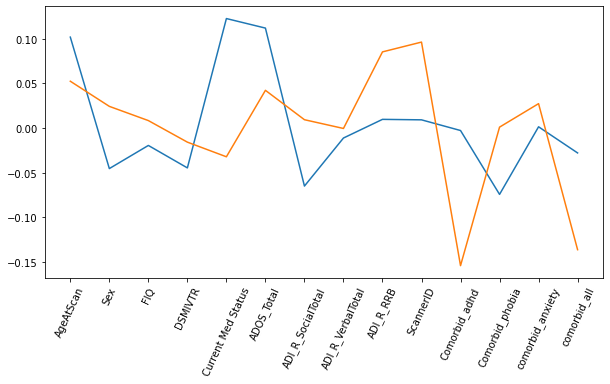

In [16]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

l1 = list()
l2 = list()
for key in keys:
    dfc = pd.DataFrame()
    dfc['ax1'] = vae_space[:,0]
    dfc['ax2'] = vae_space[:,1]
    dfc['val'] = df[key]
    dfc = dfc.dropna()
    c1 = np.corrcoef(dfc['ax1'].values,dfc['val'].values)[0,1]
    c2 = np.corrcoef(dfc['ax2'].values,dfc['val'].values)[0,1]
    l1.append(c1)
    l2.append(c2)
    
plt.figure(figsize=(10,5))
plt.plot(l1);
plt.plot(l2);
plt.xticks(np.arange(len(keys)),labels=keys,rotation=65);

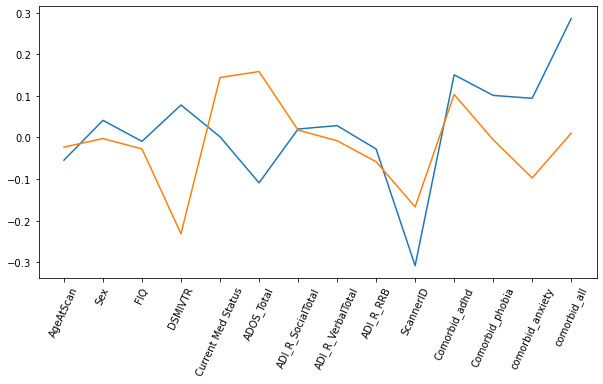

In [17]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

l1 = list()
l2 = list()
for key in keys:
    dfc = pd.DataFrame()
    dfc['ax1'] = bg_space[:,0]
    dfc['ax2'] = bg_space[:,1]
    dfc['val'] = df[key]
    dfc = dfc.dropna()
    c1 = np.corrcoef(dfc['ax1'].values,dfc['val'].values)[0,1]
    c2 = np.corrcoef(dfc['ax2'].values,dfc['val'].values)[0,1]
    l1.append(c1)
    l2.append(c2)
    
plt.figure(figsize=(10,5))
plt.plot(l1);
plt.plot(l2);
plt.xticks(np.arange(len(keys)),labels=keys,rotation=65);

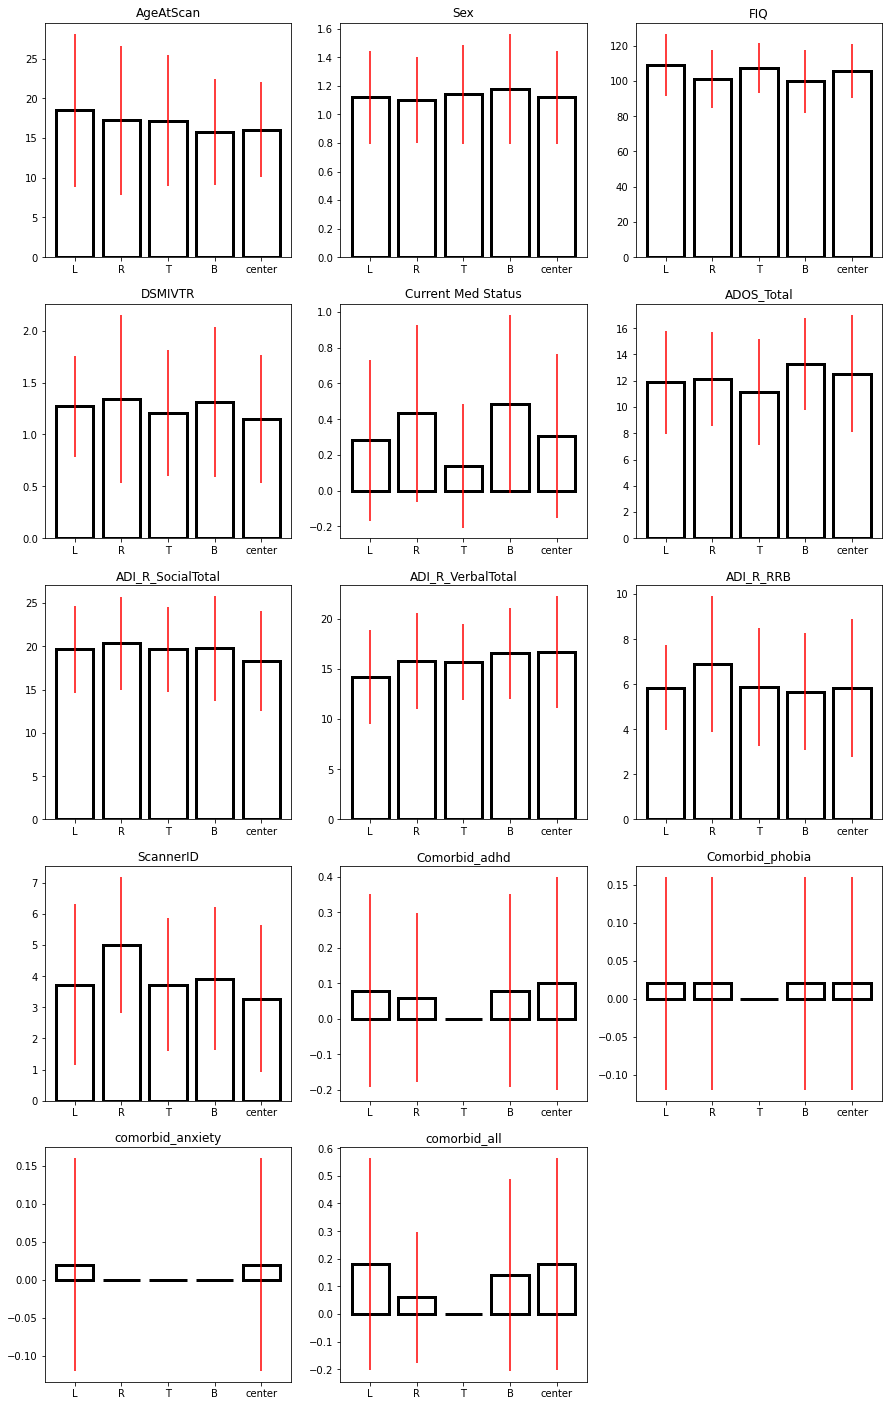

In [18]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

i = 0

plt.figure(figsize=np.array((3,5))*5)
for key in keys:
    i +=1
    plt.subplot(5,3,i)
    
    #xlbls = ['L','R','T','B','center']
    xlbls = df_new['C'].unique()
    arr = np.array([df_new[df_new['C']==c][key].values for c in xlbls])

    xs = np.arange(len(xlbls))
    #m = arr.mean(axis=1)
    # se = arr.std(axis=1);

    m = np.nanmean(arr,axis=1)
    #m = np.nanmedian(arr,axis=1)
    se = np.nanstd(arr,axis=1)
    
#     n = arr.shape[1]
#     for i in range(arr.shape[0]):
#         plt.scatter(np.repeat(i,n)+(np.random.rand(n)-.5)*.25,arr[i,:],color=[0,0,0,.5])

    plt.bar(xs,m,facecolor=[0,0,0,0],edgecolor=[0,0,0,1],linewidth=3);
    plt.errorbar(xs,m,se,fmt='r ');
    plt.xticks(xs,labels=xlbls);
    plt.title(key)